<h1>Classification of CIFAR Dataset using simple ANN Techniques</h1>

<h3>Problem Statement</h3>

Perform Data Acquisition, Preparation, Modeling using simple Artificial Neural Network Architecture (Train, Test using different Regularisations & Optimisers) using CIFAR Dataset available in below location: <br>
https://www.tensorflow.org/datasets/catalog/cifar10

### Group No : 62

### Group Member Names:

Soumyadipta Maiti (2021sc04237@wilp.bits-pilani.ac.in)

# 1. Import the required libraries

In [214]:
##---------Type the code below this line------------------##

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Data Acquisition  -- Score: 0.5 Mark
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL



In [216]:
import zipfile, requests
import urllib.request

def download(url, name):
    r = requests.get(url, allow_redirects=True)
    open(name,'wb').write(r.content)

In [217]:
download(url='https://www.cs.toronto.edu/%7Ekriz/cifar-10-python.tar.gz',  name='cifar-10-python.tar.gz')

In [218]:
import tarfile
file = tarfile.open('cifar-10-python.tar.gz')
file.extractall('./Destination_FolderName')
file.close()

In [219]:
def unpickle(filecontent):
    import pickle
    with open(filecontent, 'rb') as file:
        dictionary = pickle.load(file, encoding='bytes')
    return dictionary  

In [220]:
file = 'Destination_FolderName/cifar-10-batches-py/data_batch_1'
whole_file = unpickle(file)
print(whole_file)

{b'batch_label': b'training batch 1 of 5', b'labels': [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 

In [221]:
from tensorflow.keras.datasets import cifar10

<h1>CIFAR-10 dataset</h1>

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

This is a dataset of 50,000 32x32 color training images and 10,000 test
images, labeled over 10 categories. See more info at the
[CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).

In [222]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [223]:
x_train.shape

(50000, 32, 32, 3)

<h2> Image View from dataset </h2>

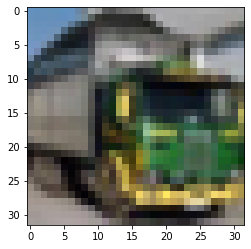

In [295]:
plt.imshow(x_train[14])

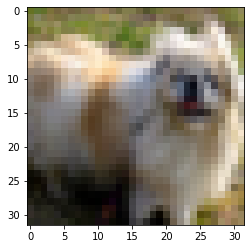

In [225]:
plt.imshow(x_train[40])

## 2.1 Write your observations from the above. 

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label. 



In [226]:
# Size of Dataset
print(f'Size of Entire CIFAR10 DatatSet : {x_train.shape[0]+x_test.shape[0]},{x_train.shape[1:]}')
print(f'Size of Training DatatSet : {x_train.shape}')
print(f'Size of Testing DatatSet : {x_test.shape}')

Size of Entire CIFAR10 DatatSet : 60000,(32, 32, 3)
Size of Training DatatSet : (50000, 32, 32, 3)
Size of Testing DatatSet : (10000, 32, 32, 3)


In [227]:
# Type of data attributes:
print(f'Data Type of Fields : {x_train.dtype}')

Data Type of Fields : uint8


In [228]:
# What are you classifying?

print(f' Unique values to be classified : {np.unique(y_train)}')

 Unique values to be classified : [0 1 2 3 4 5 6 7 8 9]


The classes are:

| Label | Description |
|:-----:|-------------|
|   0   | airplane    |
|   1   | automobile  |
|   2   | bird        |
|   3   | cat         |
|   4   | deer        |
|   5   | dog         |
|   6   | frog        |
|   7   | horse       |
|   8   | ship        |
|   9   | truck       |

[]

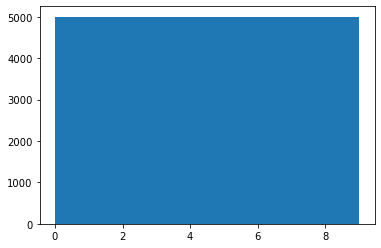

In [229]:
# Plot the distribution of the categories of the target / label. 

import matplotlib.pylab as plt
plt.hist(y_train, bins=10)
plt.plot()
# plt.xlabel("Image Type")
# plt.ylabel('Frequency')
# plt.show()

# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded. 


This stage depends on the dataset that is used. 

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

In [230]:
# to remove duplicate data

u,c = np.unique(x_train,return_counts=True)
dup = u[c>1]

In [231]:
# to impute or remove missing data

print(f'Number of Missing Rows : {np.isnan(x_train).sum()}')

Number of Missing Rows : 0


In [232]:
# to remove data inconsistencies


In [233]:
# Encode categorical data
print(f' There is no categorical values as datatype of its values are {x_train.dtype}')

 There is no categorical values as datatype of its values are uint8


In [234]:
# Normalize the data
print(f'Training Data set is having minimum value as {x_train.min()} & maximum value as {x_train.max()}')

Training Data set is having minimum value as 0 & maximum value as 255


In [235]:
#So, we need to normalize training & test data on deviding by 255 so that all values lie between 0 & 1
x_train = x_train/255
x_test = x_test/255

In [236]:
# Feature Engineering
# No extra feature Engineering is required except Normalization as mentioned above

In [237]:
# Stop word removal, lemmatiation, stemming, vectorization

# Not Applicable as it's not a Natural language Problem

## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





In [238]:
# Seperation of Data into Indepedent & Target Variable is already performed previously.

print(f'Shape of Indepedent Variable : {x_train.shape} & Target Variable : {y_train.shape}')

Shape of Indepedent Variable : (50000, 32, 32, 3) & Target Variable : (50000, 1)


In [239]:
# One-hot Encoding of Target variable
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train,num_classes=10)
y_test_cat = to_categorical(y_test,num_classes=10)

In [240]:
print(f'Shape of Target Variable in Training Set before & after One-hot Encoding are {y_train.shape} & {y_train_cat.shape}')

Shape of Target Variable in Training Set before & after One-hot Encoding are (50000, 1) & (50000, 10)


## 3.3 Split the data into training set and testing set

In [241]:
# Split of Data into Training & Testing Set is already performed previously.

print(f'Shape of Training Set : {x_train.shape} & Testing Set : {x_test.shape}')

Shape of Training Set : (50000, 32, 32, 3) & Testing Set : (10000, 32, 32, 3)


## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 
* to encode categorical data 
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


In [242]:
##---------Type the answer below this line------------------##

# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN. 

In [243]:
##---------Type the code below this line------------------##

<h1> Modeling using Artificial neural Network (ANN) </h1>

Although this Computer Vision problem could be solved preferebly using Convolution Neural Network (CNN), we could not use it as mentioned in problem statement 

In [244]:
# Sequential Model Building with Activation for each layer.
# Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
# Use Relu Activation function in each hidden layer
# Use Sigmoid / softmax Activation function in the output layer as required


In [245]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten

<h2>Creation of ANN Model</h2>

In [246]:
model_ann = Sequential()

In [247]:
#Input layer

# model_ann.add(Flatten(input_shape=x_train.shape[1:]))
model_ann.add(Flatten(input_shape=(32,32,3)))

#Hidden Layer 1
model_ann.add(Dense(units=100, activation='relu'))
# model_ann.add(Dropout(0.2))

#Hidden Layer 2
model_ann.add(Dense(units=50, activation='relu'))
# model_ann.add(Dropout(0.2))


#Hidden Layer 3
model_ann.add(Dense(units=100, activation='relu'))
# model_ann.add(Dropout(0.2))

#Output Layer
model_ann.add(Dense(units=y_train_cat.shape[1], activation='softmax'))

In [297]:
y_train_cat.shape[1]

10

## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters 



In [248]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [249]:
epochs=60
lr = 0.1
decay_rate = lr / epochs
momentum = 0.8

In [250]:
# Typical values for those hyperparameters are lr=0.01, decay=1e-6, momentum=0.9, and nesterov=True.
sgd = SGD(learning_rate=lr, momentum=momentum, decay=decay_rate, nesterov = False)

In [251]:
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,)

# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [252]:
model_ann.compile(optimizer='adam',
#                   optimizer=sgd, 
                  loss='categorical_crossentropy', 
#                   loss='binary_crossentropy',
                  metrics=['accuracy'])

In [253]:
model_ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_5 (Dense)             (None, 100)               307300    
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 100)               5100      
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 318,460
Trainable params: 318,460
Non-trainable params: 0
_________________________________________________________________


In [254]:
import keras_tuner
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [255]:
def build_model(hp):  # random search passes this hyperparameter() object 
    model = Sequential()
    
    activation = hp.Choice(name = 'activation', values = ['relu', 'tanh', 'sigmoid'], ordered = False, default='relu')
#     dropout = hp.Boolean(name = 'dropout', default = False)
#     learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    no_layer = hp.Int(name = 'no_layer', min_value = 2, max_value = 10)
    no_unit = hp.Int(f'layer_unit', min_value = 50, max_value = 400, step=50, default=50)
    optimizer = hp.Choice(name = 'optimizer', values = ['adam', 'sgd', 'rmsprop'], default='adam')
    
    #Input layer
    model.add(Flatten(input_shape=(32,32,3)))
    
    
    for i in range(no_layer):
        model.add(Dense(no_unit, activation=activation))
#         model.add(Dropout(0.2))


    #Output Layer
    model.add(Dense(units=y_train_cat.shape[1], activation='softmax'))
    
    model.compile(optimizer=optimizer,
#                   loss='binary_crossentropy',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


    return model

In [256]:
import time
LOG_DIR = f"{int(time.time())}"

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # how many model variations to test?
    executions_per_trial=5,  # how many trials per variation? (same model could perform differently)
    directory=LOG_DIR)

In [257]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
no_layer (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
layer_unit (Int)
{'default': 50, 'conditions': [], 'min_value': 50, 'max_value': 400, 'step': 50, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd', 'rmsprop'], 'ordered': False}


In [258]:
tuner.search(x=x_train, 
              y=y_train_cat,
              epochs=1, 
              batch_size=64,
              validation_data=(x_test, y_test_cat), 
              verbose=2, 
#               callbacks=[early_stop]
             )

Trial 5 Complete [00h 00m 48s]
val_accuracy: 0.33222000002861024

Best val_accuracy So Far: 0.33222000002861024
Total elapsed time: 00h 03m 45s
INFO:tensorflow:Oracle triggered exit


In [259]:
tuner.results_summary()

Results summary
Results in 1686847964\untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
activation: relu
no_layer: 7
layer_unit: 300
optimizer: adam
Score: 0.33222000002861024

Trial 1 summary
Hyperparameters:
activation: tanh
no_layer: 6
layer_unit: 400
optimizer: sgd
Score: 0.32544000148773194

Trial 3 summary
Hyperparameters:
activation: relu
no_layer: 10
layer_unit: 200
optimizer: adam
Score: 0.288400000333786

Trial 0 summary
Hyperparameters:
activation: tanh
no_layer: 6
layer_unit: 250
optimizer: adam
Score: 0.2814999997615814

Trial 2 summary
Hyperparameters:
activation: tanh
no_layer: 9
layer_unit: 200
optimizer: adam
Score: 0.27374000251293185


In [299]:
print(tuner.get_best_hyperparameters()[0].values)

{'activation': 'relu', 'no_layer': 7, 'layer_unit': 300, 'optimizer': 'adam'}


In [261]:
best_model = tuner.get_best_models()[0]
print(best_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dense_3 (Dense)             (None, 300)               90300     
                                                                 
 dense_4 (Dense)             (None, 300)               90300     
                                                                 
 dense_5 (Dense)             (None, 300)               9

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [262]:
from tensorflow.keras.callbacks import EarlyStopping

In [263]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [264]:
print(f'{x_train.shape} ; {y_train_cat.shape} :: {x_test.shape}; {y_test_cat.shape}')

(50000, 32, 32, 3) ; (50000, 10) :: (10000, 32, 32, 3); (10000, 10)


In [265]:
model_ann.fit(x=x_train, 
              y=y_train_cat,
              epochs=200, 
              batch_size=200,
              validation_data=(x_test, y_test_cat), 
              verbose=2, 
              callbacks=[early_stop]
             )

Epoch 1/200
250/250 - 2s - loss: 1.9258 - accuracy: 0.2995 - val_loss: 1.7925 - val_accuracy: 0.3550 - 2s/epoch - 7ms/step
Epoch 2/200
250/250 - 1s - loss: 1.7282 - accuracy: 0.3804 - val_loss: 1.6700 - val_accuracy: 0.3995 - 1s/epoch - 4ms/step
Epoch 3/200
250/250 - 1s - loss: 1.6496 - accuracy: 0.4095 - val_loss: 1.6022 - val_accuracy: 0.4272 - 1s/epoch - 4ms/step
Epoch 4/200
250/250 - 1s - loss: 1.5865 - accuracy: 0.4340 - val_loss: 1.5675 - val_accuracy: 0.4451 - 1s/epoch - 5ms/step
Epoch 5/200
250/250 - 1s - loss: 1.5478 - accuracy: 0.4456 - val_loss: 1.5729 - val_accuracy: 0.4379 - 1s/epoch - 5ms/step
Epoch 6/200
250/250 - 1s - loss: 1.5111 - accuracy: 0.4582 - val_loss: 1.5361 - val_accuracy: 0.4490 - 1s/epoch - 5ms/step
Epoch 7/200
250/250 - 1s - loss: 1.4894 - accuracy: 0.4686 - val_loss: 1.5057 - val_accuracy: 0.4637 - 1s/epoch - 5ms/step
Epoch 8/200
250/250 - 1s - loss: 1.4680 - accuracy: 0.4771 - val_loss: 1.5445 - val_accuracy: 0.4525 - 1s/epoch - 5ms/step
Epoch 9/200
250/

In [266]:
loss = pd.DataFrame(model_ann.history.history)

In [267]:
from scikeras.wrappers import KerasClassifier, KerasRegressor
kmodel = KerasClassifier(model=best_model)
# print(kmodel.get_params().keys())

In [268]:
# from sklearn.model_selection import GridSearchCV

# batchsize = [10, 50, 100, 150, 200]
# epochsize = [10, 50, 100, 150, 200]
# # optimizer = ['SGD', 'RMSprop', 'Adam']

# grid_param = dict(batch_size=batchsize, epochs=epochsize)
# grid_model = GridSearchCV(estimator=kmodel, param_grid=grid_param, n_jobs=1, cv=3)

In [269]:
# model.optimizer.build

In [270]:
# grid_result = grid_model.fit(X=x_train, y=y_train_cat)

In [271]:
# print(f'Best scores {grid_result.best_score_} for parameters {grid_result.best_params_} ')

In [272]:
# best_model.fit(x=x_train, 
#               y=y_train_cat,
#               epochs=200, 
#               batch_size=200,
#               validation_data=(x_test, y_test_cat), 
#               verbose=2, 
#               callbacks=[early_stop]
#              )

In [273]:
# import pandas as pd
# loss = pd.DataFrame(best_model.history.history)

In [274]:
# #Save our Model Built above
# model_ann.save('cifar10_ann_v_01.h5')

Justify your choice of optimizers and regulizations used and the hyperparameters tuned


In [275]:
##---------Type the answers below this line------------------##

# 6. Test the model - 0.5 marks


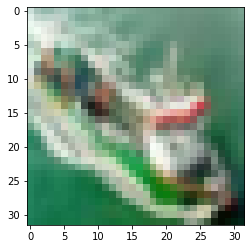

In [276]:
test_image = x_test[15]
plt.imshow(test_image)

In [277]:
test_image_pred = model_ann.predict(test_image.reshape(1,32,32,3))
test_image_pred = np.argmax(test_image_pred, axis=1)
test_image_pred

1/1 [==============================] - 0s 111ms/step


array([8], dtype=int64)

# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history. 
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


In [278]:
print(loss)

        loss  accuracy  val_loss  val_accuracy
0   1.925811   0.29952  1.792477        0.3550
1   1.728182   0.38044  1.669987        0.3995
2   1.649645   0.40948  1.602214        0.4272
3   1.586482   0.43398  1.567480        0.4451
4   1.547845   0.44562  1.572937        0.4379
5   1.511078   0.45824  1.536071        0.4490
6   1.489363   0.46862  1.505685        0.4637
7   1.467976   0.47710  1.544541        0.4525
8   1.447530   0.48446  1.479221        0.4722
9   1.426898   0.49060  1.468204        0.4841
10  1.404422   0.49978  1.466313        0.4789
11  1.399668   0.50166  1.482786        0.4723
12  1.383803   0.50622  1.452906        0.4902
13  1.364391   0.51242  1.473728        0.4745
14  1.364641   0.51258  1.456110        0.4829
15  1.347951   0.52128  1.418751        0.4956
16  1.341374   0.52192  1.493014        0.4764
17  1.325251   0.52750  1.457139        0.4849
18  1.319530   0.53066  1.432071        0.4961


<AxesSubplot:>

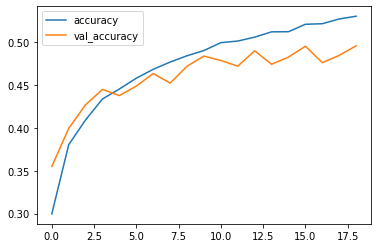

In [279]:
# Plot the training and validation accuracy history.

loss[['accuracy','val_accuracy']].plot()

In [280]:
# Plot the training and validation loss history.

<AxesSubplot:>

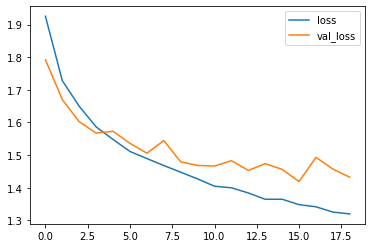

In [281]:
loss[['loss','val_loss']].plot()

In [282]:
# Report the testing accuracy and loss.


In [283]:
print(model_ann.metrics_names)
print(model_ann.evaluate(x=x_test, y=y_test_cat, verbose = 0))

['loss', 'accuracy']
[1.4320714473724365, 0.4961000084877014]


In [284]:
# Show Confusion Matrix for testing dataset.

In [285]:
from sklearn.metrics import classification_report, confusion_matrix

In [286]:
y_test_predict = model_ann.predict(x=x_test, verbose=0)
y_test_predict = np.argmax(y_test_predict, axis=1)

In [287]:
print(confusion_matrix(y_true=y_test, y_pred=y_test_predict))

[[628  34  47  24  31  20  17  50  93  56]
 [ 66 652   6  25  11  29  14  35  42 120]
 [ 99  33 315  76 129 112 124  87  12  13]
 [ 53  31  75 287  54 226 140  67  28  39]
 [ 72  15  99  48 379  70 158 130  19  10]
 [ 29  18  66 182  56 417  90 103  23  16]
 [ 13  10  58  84  96  67 615  29  12  16]
 [ 58  25  36  47  59  84  29 618   9  35]
 [170  84  22  27  20  31  14  31 528  73]
 [ 59 193  10  41  11  22  37  66  39 522]]


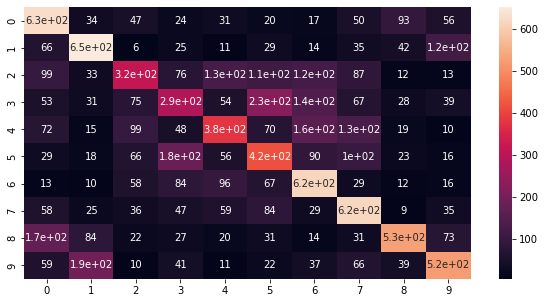

In [288]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True)
plt.show()

In [289]:
# Report values for preformance study metrics like accuracy, precision, recall, F1 Score.

In [290]:
print(classification_report(y_true=y_test, y_pred=y_test_predict))

              precision    recall  f1-score   support

           0       0.50      0.63      0.56      1000
           1       0.60      0.65      0.62      1000
           2       0.43      0.32      0.36      1000
           3       0.34      0.29      0.31      1000
           4       0.45      0.38      0.41      1000
           5       0.39      0.42      0.40      1000
           6       0.50      0.61      0.55      1000
           7       0.51      0.62      0.56      1000
           8       0.66      0.53      0.59      1000
           9       0.58      0.52      0.55      1000

    accuracy                           0.50     10000
   macro avg       0.49      0.50      0.49     10000
weighted avg       0.49      0.50      0.49     10000



# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1 

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



In [291]:
##---------Type the code below this line------------------##

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04. 

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



In [292]:
##---------Type the code below this line------------------##

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


In [293]:
##---------Type the code below this line------------------##

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


In [294]:
##---------Type the code below this line------------------##

### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck